In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [28]:
processed_df = df.drop(['households'], axis=1)
processed_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,15.000100,500001.000000


In [12]:
processed_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

**Plotting correlation matrix to find the suitable explanatory variable for a response variable**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

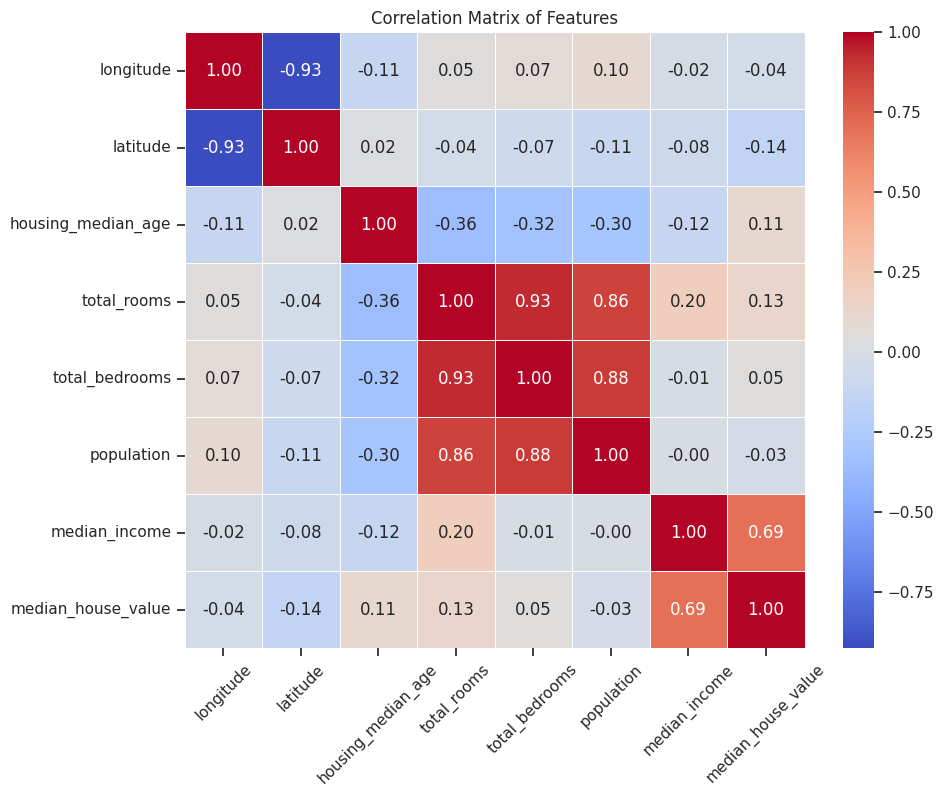

In [13]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Matrix of Features')
plt.show()

**Ploting histogram of dependent variable for checking Normality (Is the selected feature normally distributed or not)**

Using the above cor plot - Finding the relation b/w total bedrooms (x) and total number of rooms (y) in a given housing complex

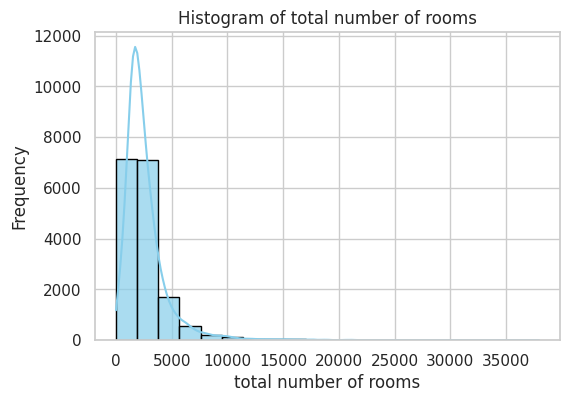

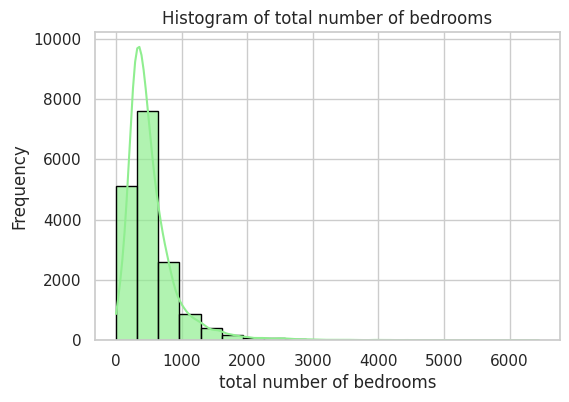

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(data=processed_df, x='total_rooms', bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of total number of rooms')
plt.xlabel('total number of rooms')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=processed_df, x='total_bedrooms', bins=20, kde=True, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of total number of bedrooms')
plt.xlabel('total number of bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [29]:
processed_df = processed_df[processed_df['total_bedrooms'] <= 1000]

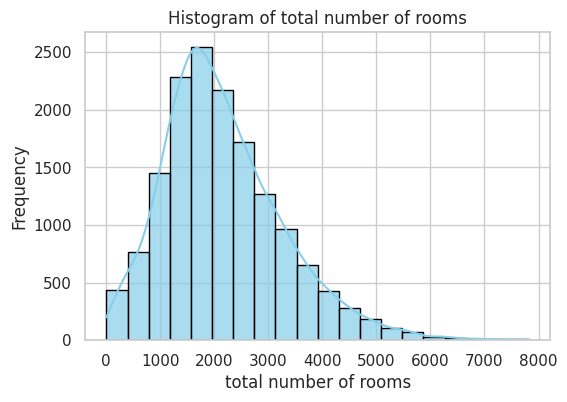

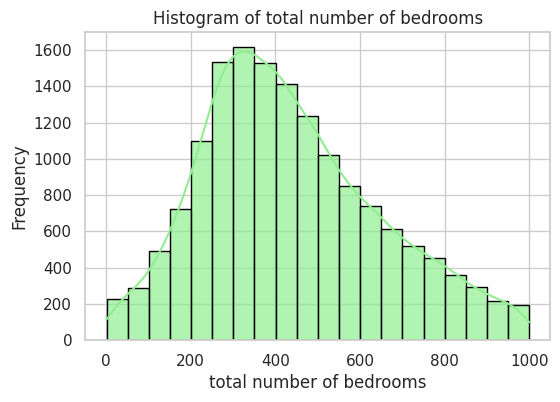

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(data=processed_df, x='total_rooms', bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of total number of rooms')
plt.xlabel('total number of rooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=processed_df, x='total_bedrooms', bins=20, kde=True, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of total number of bedrooms')
plt.xlabel('total number of bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
X = processed_df[['total_bedrooms']]
y = processed_df['total_rooms']
print(X.shape)
print(y.shape)

(15424, 1)
(15424,)


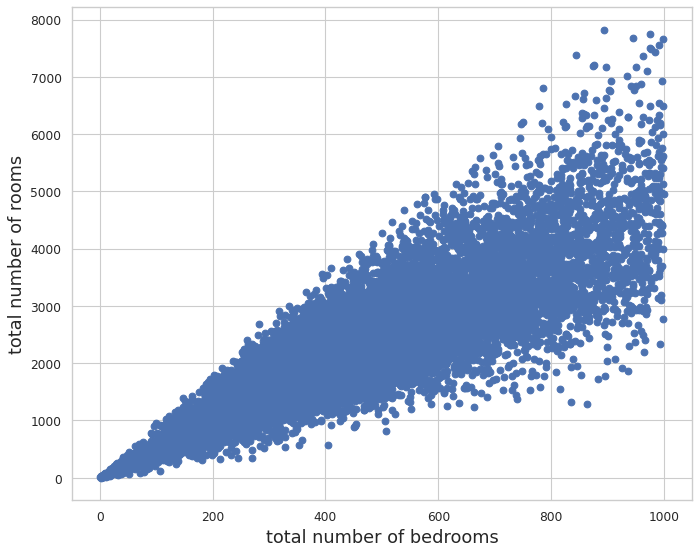

In [47]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X,y)
plt.xlabel("total number of bedrooms",size = 16)
plt.ylabel("total number of rooms",size = 16)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_pred))
print("Max error:",metrics.max_error(y_test,y_pred))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_pred))

Explaind variance: 0.7561595700397481
Max error: 3020.4454444759085
Mean absolute error: 397.7856684582995
Mean squared error: 304615.2162784489
R-2 score: 0.7561490453370469


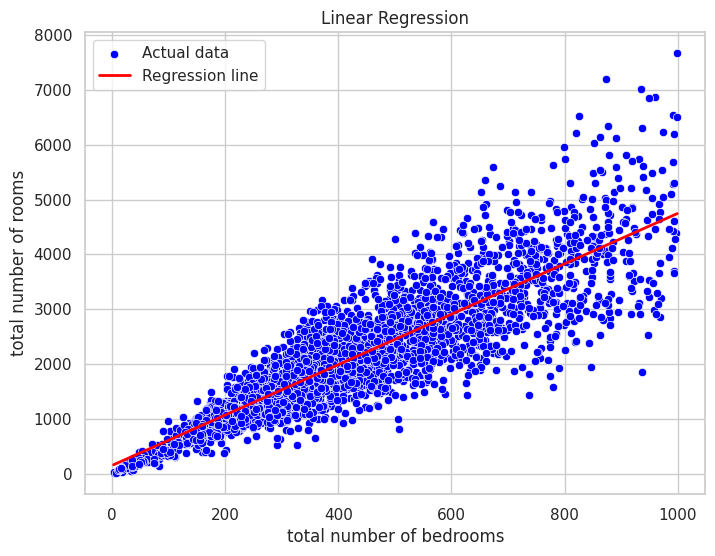

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual data')

sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', linewidth=2, label='Regression line')

plt.title('Linear Regression')
plt.xlabel('total number of bedrooms')
plt.ylabel('total number of rooms')
plt.legend()
plt.grid(True)

plt.show()

**Implementation in R**

In [20]:
install.packages(c("readr","dplyr","ggplot2","ggcorrplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [21]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggcorrplot)

In [22]:
df <- read_csv("/content/sample_data/california_housing_train.csv")
head(df)

Rows: 17000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
-114.56,33.69,17,720,174,333,117,1.6509,85700
-114.57,33.64,14,1501,337,515,226,3.1917,73400
-114.57,33.57,20,1454,326,624,262,1.9250,65500
-114.58,33.63,29,1387,236,671,239,3.3438,74000


In [23]:
processed_df <- df %>% select(-households)
summary(processed_df)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1462  
 Median :-118.5   Median :34.25   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.59      Mean   : 2644  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3151  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :37937  
 total_bedrooms     population    median_income     median_house_value
 Min.   :   1.0   Min.   :    3   Min.   : 0.4999   Min.   : 14999    
 1st Qu.: 297.0   1st Qu.:  790   1st Qu.: 2.5664   1st Qu.:119400    
 Median : 434.0   Median : 1167   Median : 3.5446   Median :180400    
 Mean   : 539.4   Mean   : 1430   Mean   : 3.8836   Mean   :207301    
 3rd Qu.: 648.2   3rd Qu.: 1721   3rd Qu.: 4.7670   3rd Qu.:265000    
 Max.   :6445.0   Max.   :35682   Max.   :15.0001   Max.   :500001    

In [24]:
colSums(is.na(processed_df))

longitude           latitude housing_median_age        total_rooms 
                 0                  0                  0                  0 
    total_bedrooms         population      median_income median_house_value 
                 0                  0                  0                  0

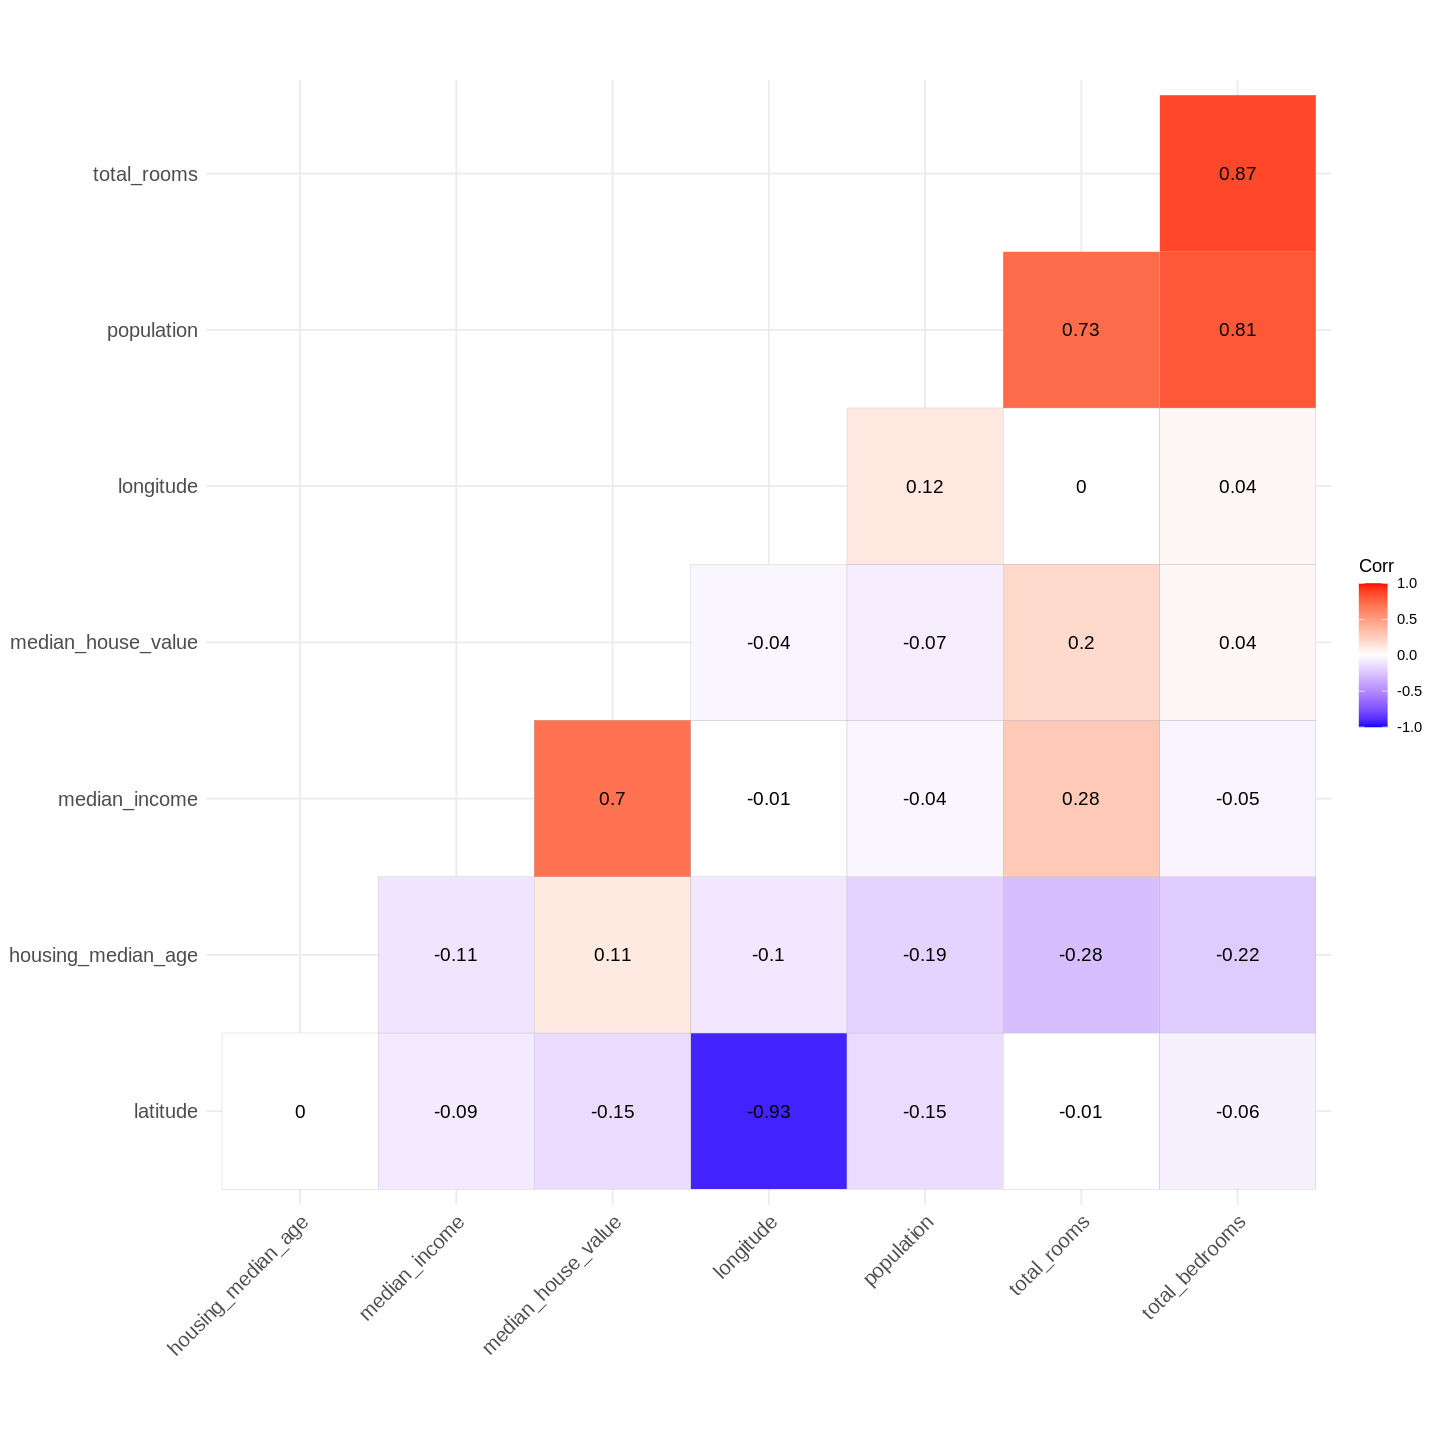

In [36]:
Correlation_matrix <- cor(processed_df)

options(repr.plot.width =12, repr.plot.height =12)

ggcorrplot(Correlation_matrix, hc.order = TRUE, type = "lower", lab = TRUE)
options(repr.plot.width =7, repr.plot.height =7)

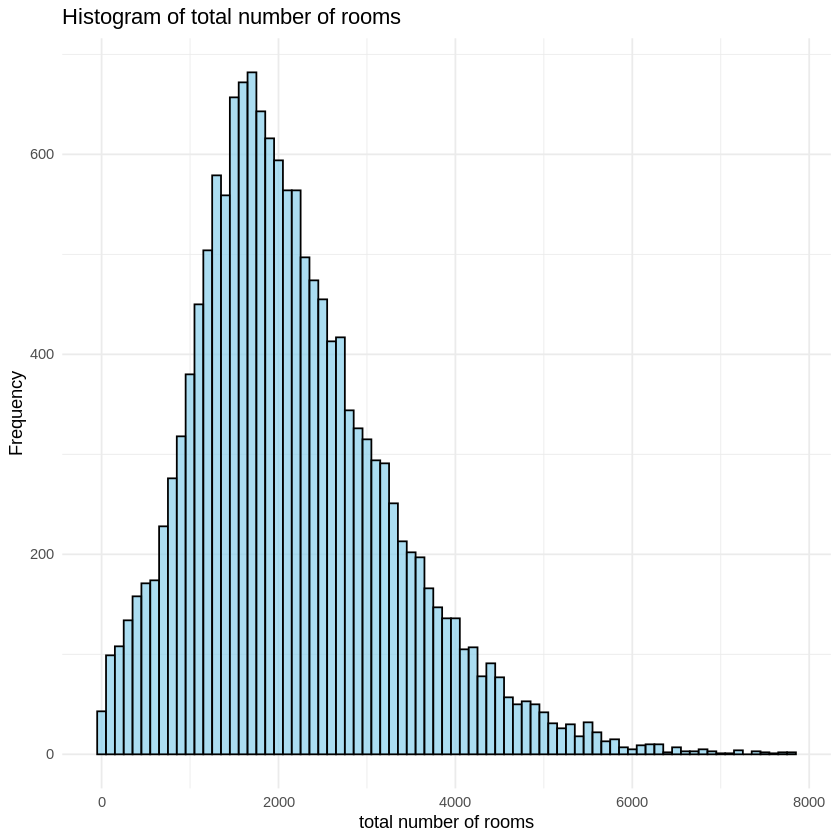

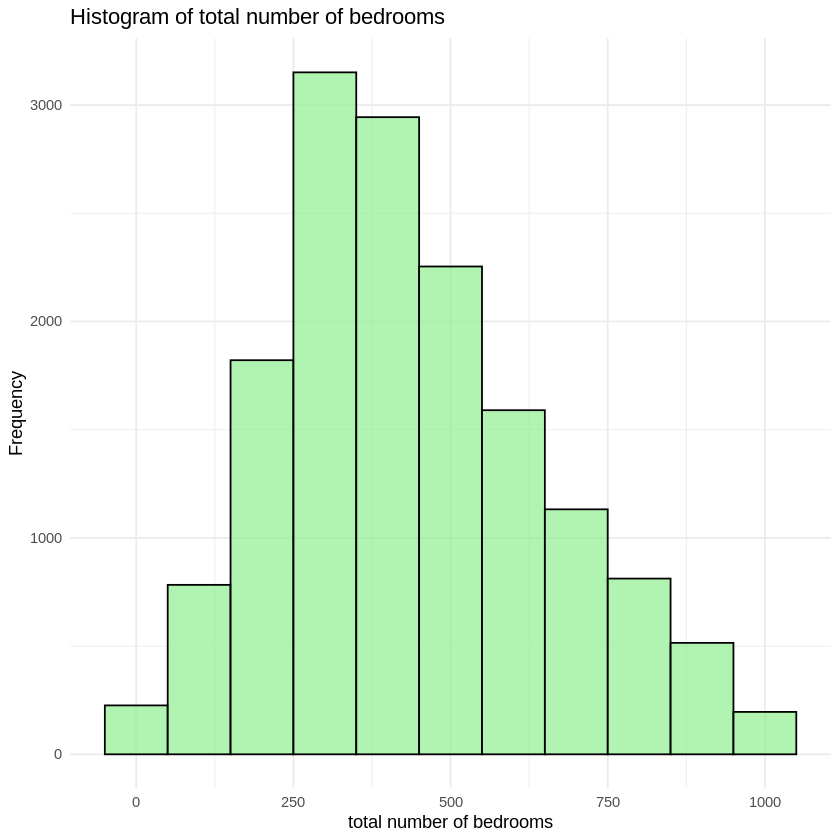

In [37]:
ggplot(data = processed_df, aes(x = total_rooms)) +
  geom_histogram(binwidth = 100, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of total number of rooms", x = "total number of rooms", y = "Frequency") +
  theme_minimal()

ggplot(data = processed_df, aes(x = total_bedrooms)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of total number of bedrooms", x = "total number of bedrooms", y = "Frequency") +
  theme_minimal()


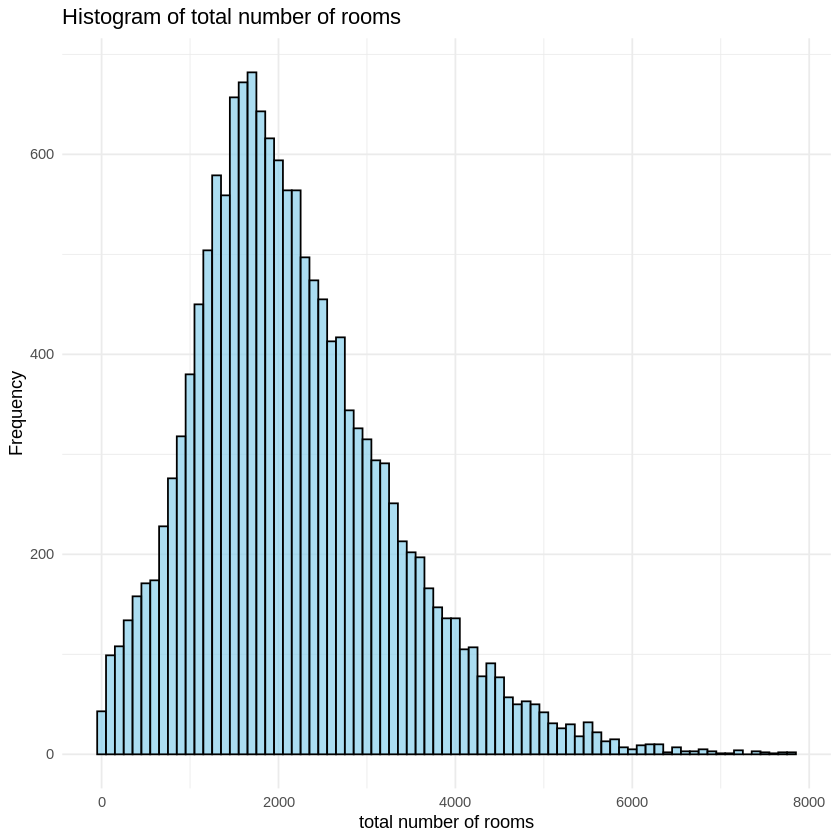

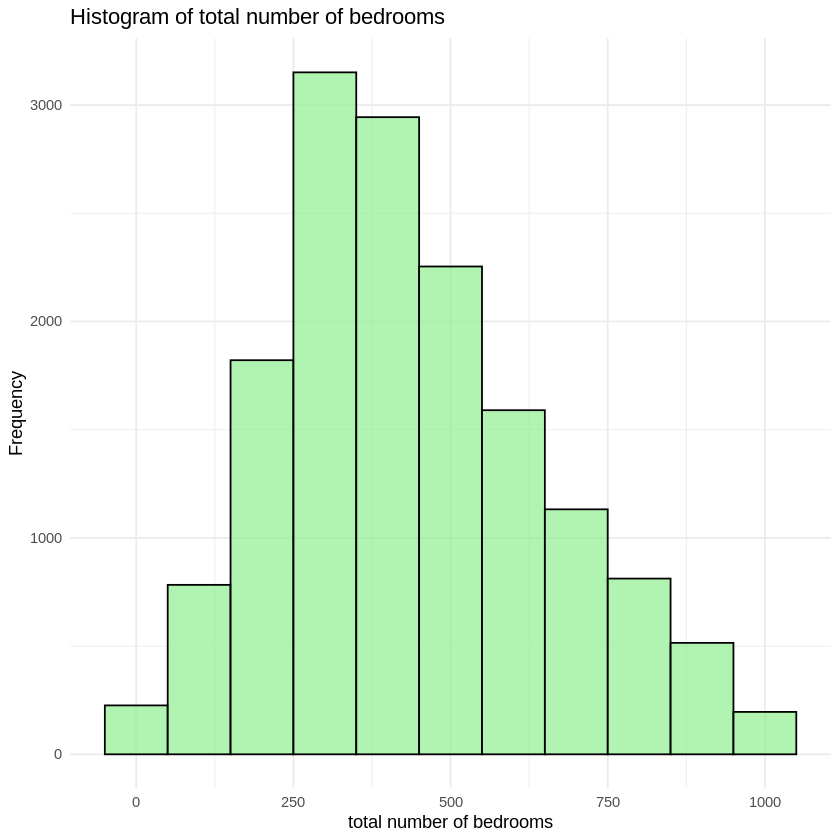

In [38]:
processed_df <- filter(processed_df, total_bedrooms <= 1000)

ggplot(data = processed_df, aes(x = total_rooms)) +
  geom_histogram(binwidth = 100, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of total number of rooms", x = "total number of rooms", y = "Frequency") +
  theme_minimal()

ggplot(data = processed_df, aes(x = total_bedrooms)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of total number of bedrooms", x = "total number of bedrooms", y = "Frequency") +
  theme_minimal()

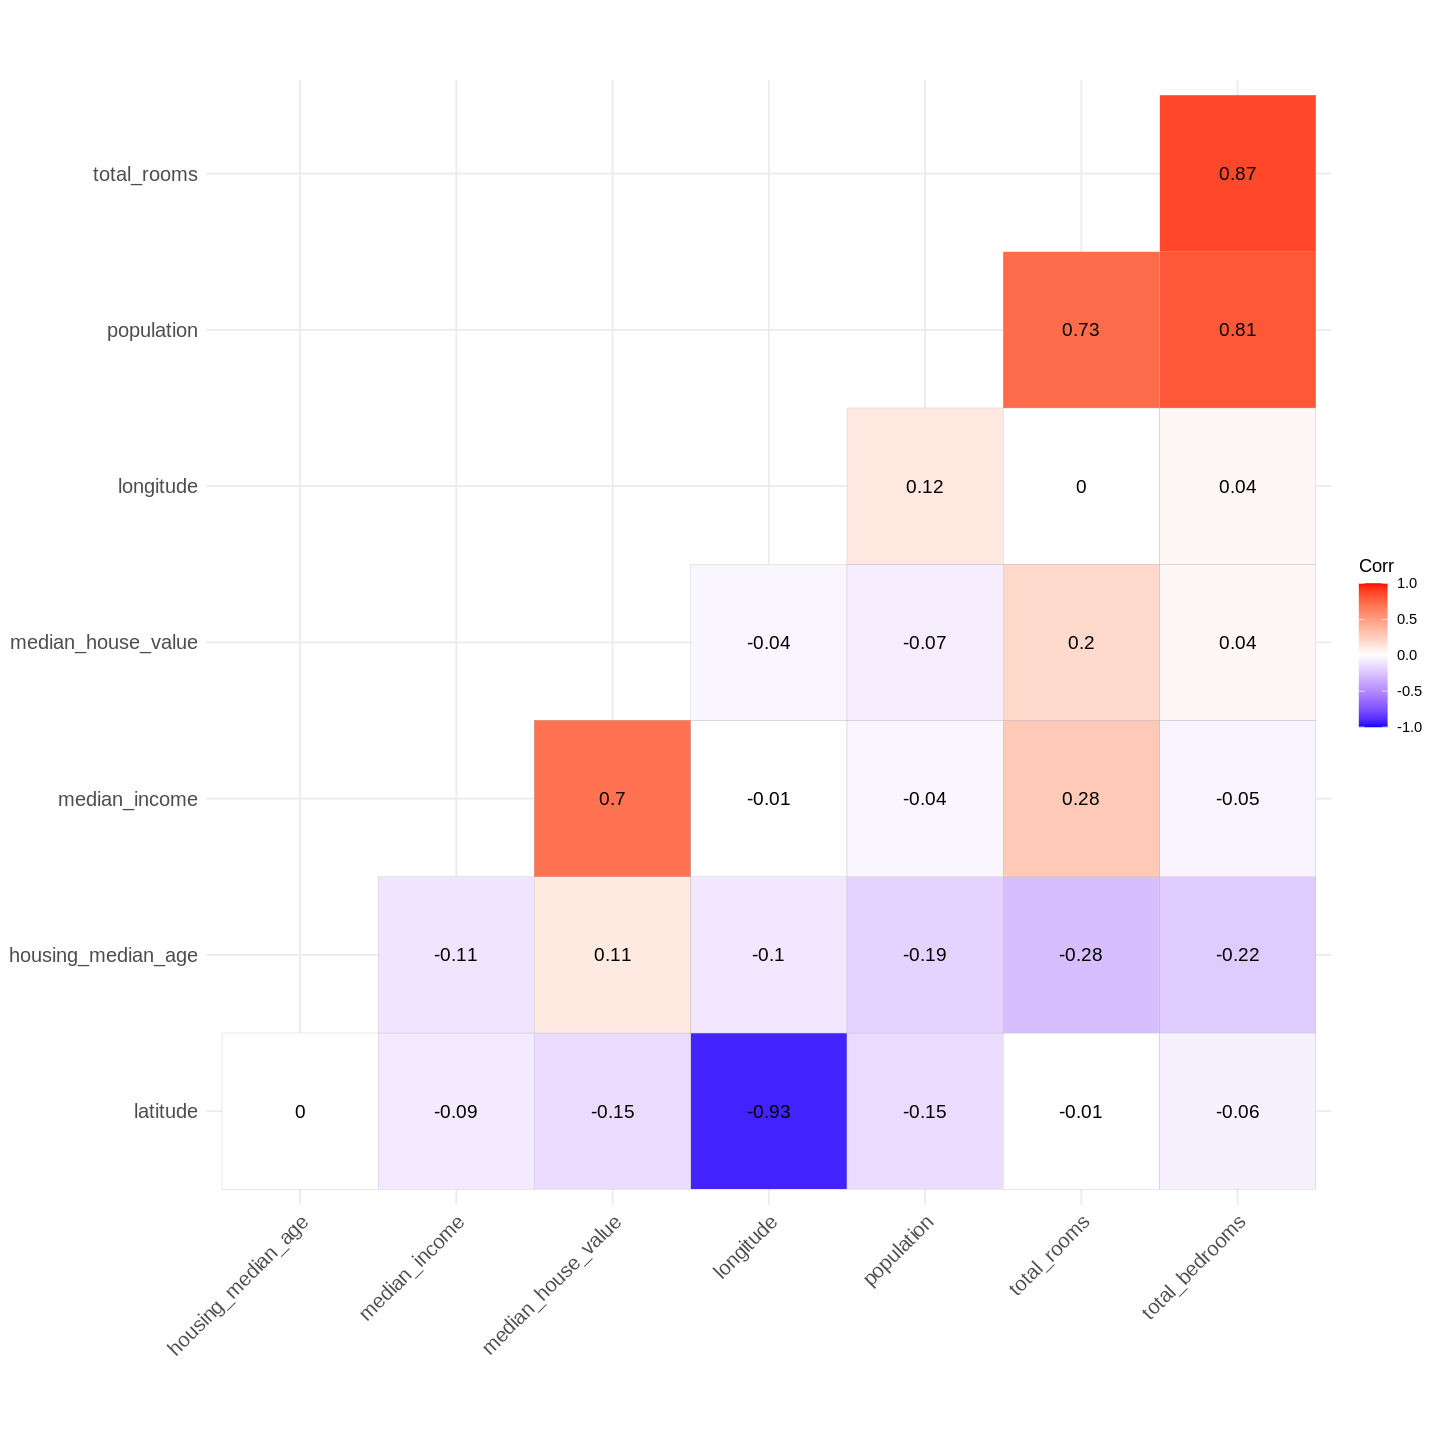

In [39]:
Correlation_matrix <- cor(processed_df)

options(repr.plot.width =12, repr.plot.height =12)

ggcorrplot(Correlation_matrix, hc.order = TRUE, type = "lower", lab = TRUE)

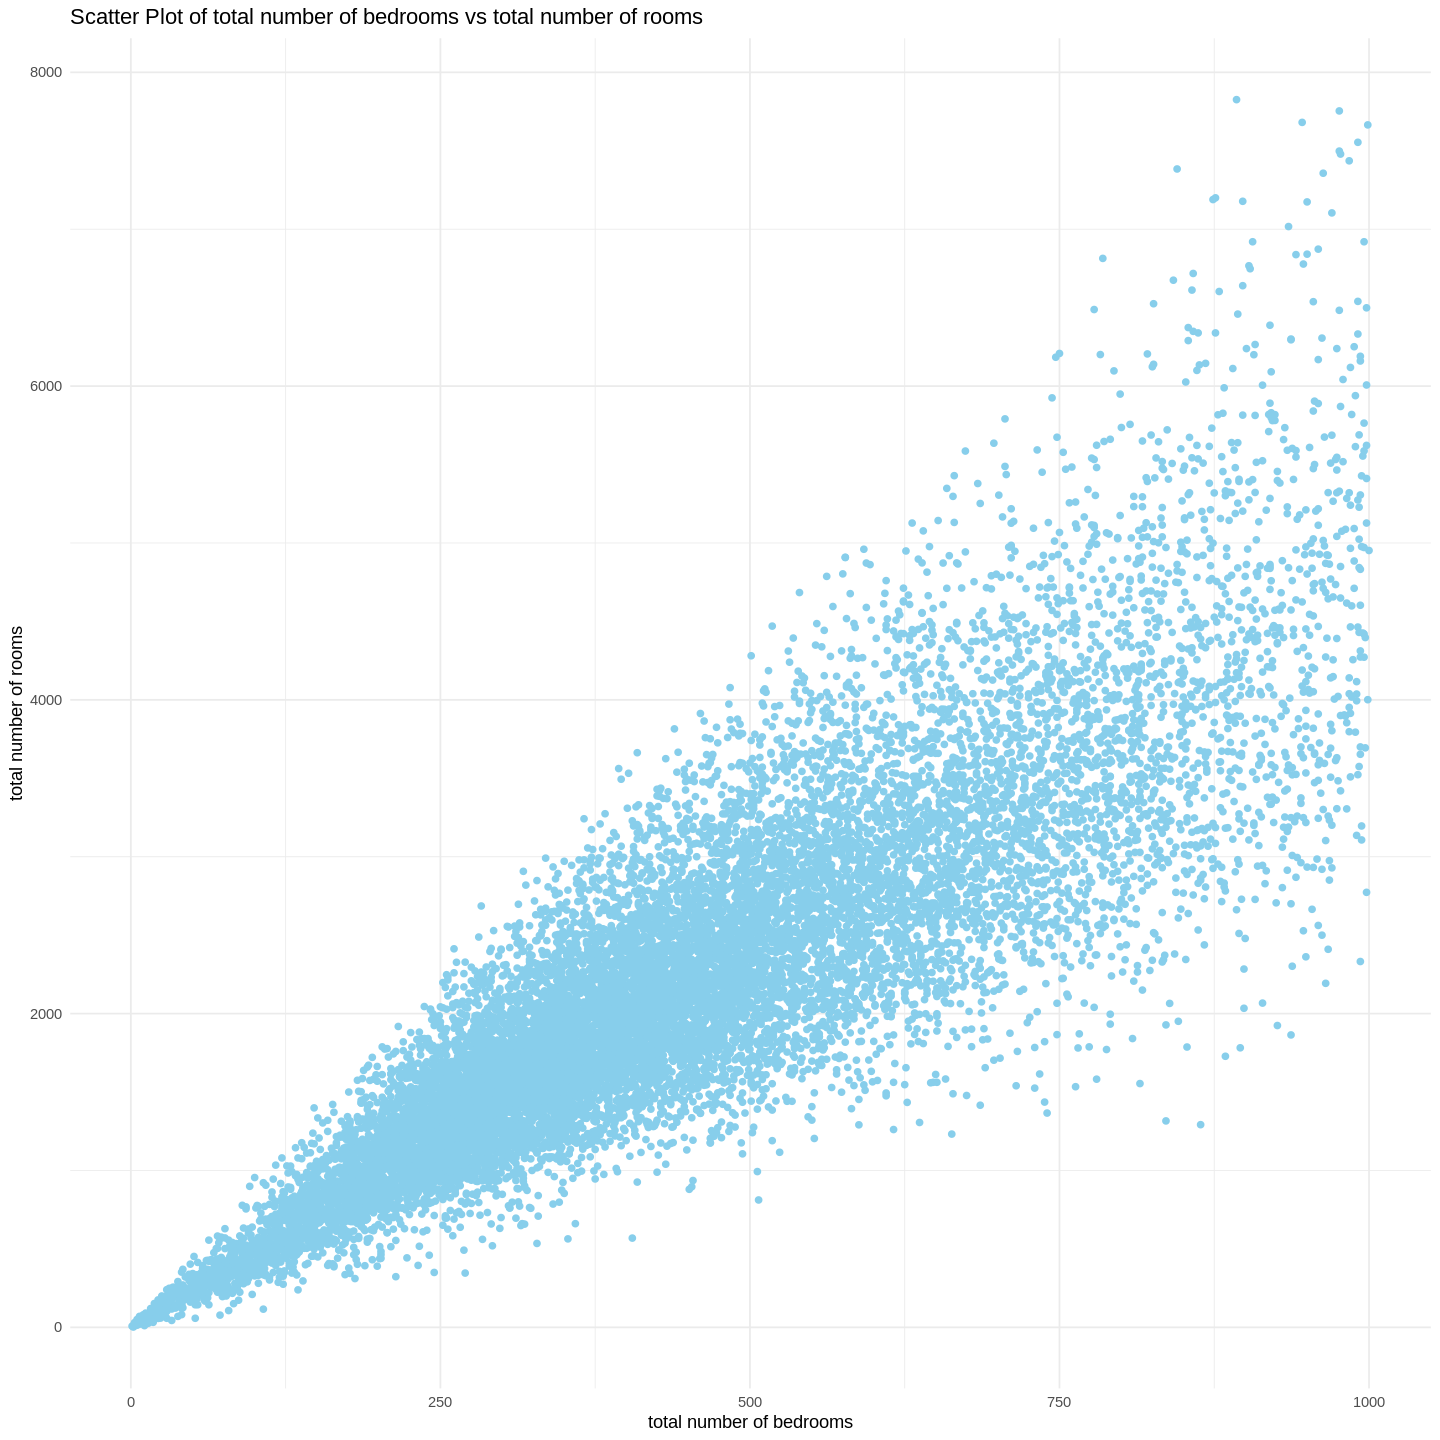

In [40]:
ggplot(data = processed_df, aes(x = total_bedrooms, y = total_rooms)) +
  geom_point(color = "Skyblue") +
  labs(title = "Scatter Plot of total number of bedrooms vs total number of rooms", x = "total number of bedrooms", y = "total number of rooms") +
  theme_minimal()

In [41]:
model <- lm(total_rooms ~ total_bedrooms, data = processed_df)

summary(model)


Call:
lm(formula = total_rooms ~ total_bedrooms, data = processed_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2831.4  -291.2   -38.5   259.3  3569.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    153.61804   10.21588   15.04   <2e-16 ***
total_bedrooms   4.59468    0.02101  218.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 551.2 on 15422 degrees of freedom
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7562 
F-statistic: 4.783e+04 on 1 and 15422 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


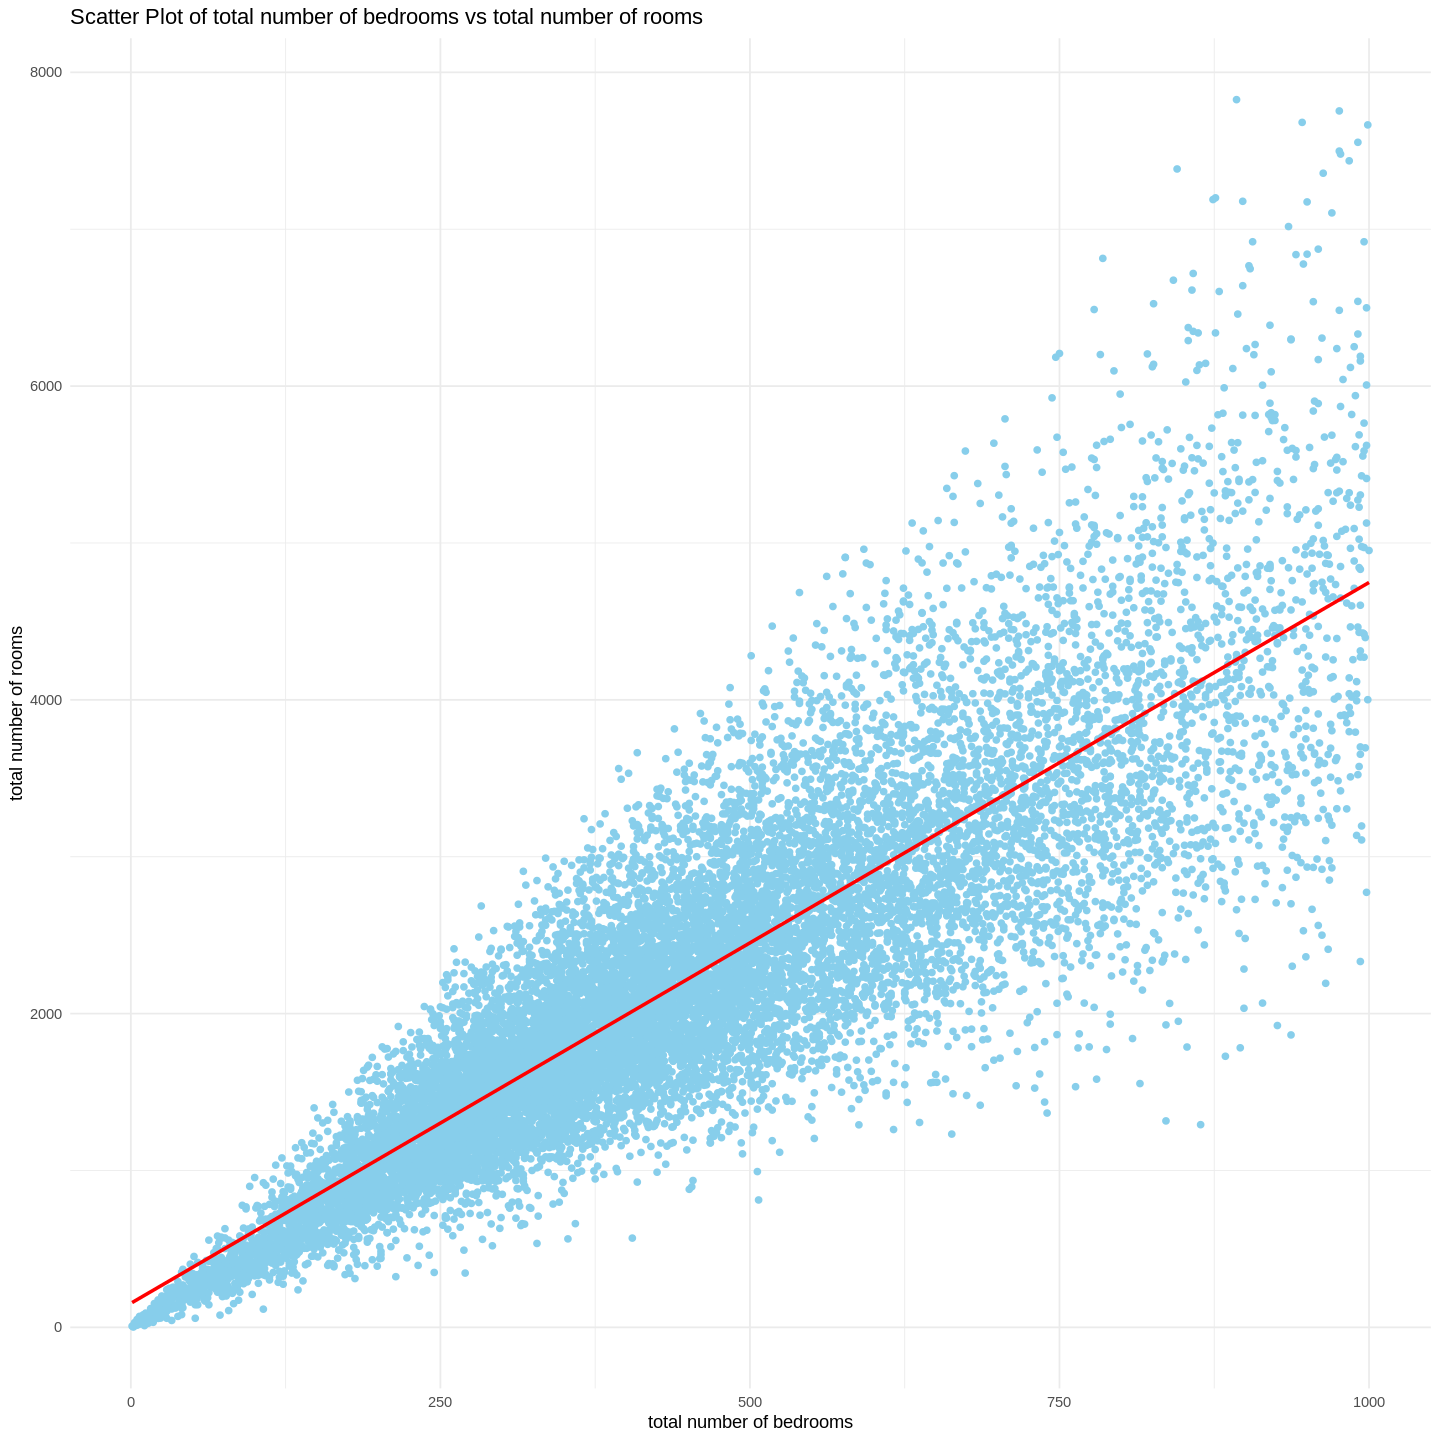

In [42]:
ggplot(data = processed_df, aes(x = total_bedrooms, y = total_rooms)) +
  geom_point(color = "Skyblue") +
  labs(title = "Scatter Plot of total number of bedrooms vs total number of rooms", x = "total number of bedrooms", y = "total number of rooms") +
  theme_minimal()+
  geom_smooth(method = "lm", se = FALSE, color = "red")
